# Perceptron

## Fungsi-fungsi *Plotting*

Jangan mengubah kode pada *cell* di bawah ini.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(f1, f2, X, target, padding=1, marker='o'):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()
    markers = f'r{marker}', f'b{marker}'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], markers[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, f1(line_x))
    plt.plot(line_x, f2(line_x))
    plt.show()

## Praktikum

### a) Fungsi *Step* Perceptron

Tulis kode ke dalam *cell* di bawah ini:

In [2]:
def percep_step(input, th=0):
  return 1 if input > th else -1 if input < -th else 0

### b) Fungsi *training* Perceptron

Tulis kode ke dalam *cell* di bawah ini:

In [3]:
def percep_fit(X, target, th=0, a=1, max_epoch=10, verbose=False, draw=False):
  w = np.zeros(len(X[0]) + 1)
  bias = np.ones((len(X), 1))
  X = np.hstack((bias, X))
  stop = False
  epoch = 0
  while not stop and (max_epoch == -1 or epoch < max_epoch):
    stop = True
    epoch += 1
    if verbose:
      print('\nEpoch', epoch)
      for r, row in enumerate(X):
        y_in = np.dot(row, w)
        y = percep_step(y_in, th)
        if y != target[r]:
          stop = False
          w = [w[i] + a * target[r] * row[i] for i in range(len(row))]
          if verbose:
            print('Bobot:', w)
          if draw:
            plot(line(w, th), line(w, -th), X, target)
  return w, epoch


### c) Fungsi *testing* Perceptron

Tulis kode ke dalam *cell* di bawah ini:

In [4]:
def percep_predict(X, w, th=0):
    Y = []
    for x in X:
        y_in = w[0] + np.dot(x, w[1:])
        y = percep_step(y_in, th)
        Y.append(y)
    return Y

In [5]:
def calc_accuracy(a, b):
    s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
    return sum(s) / len(a)


## Soal


Gunakan dataset "data.csv" yang telah dilampirkan

In [6]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving data.csv to data (11).csv


Kolom Activity berperan sebagai label dan memiliki beberapa kelas:
1. SITTING
2. LAYING
3. WALKING
4. STANDING
5. WALKING_DOWNSTAIRS
6. WALKING_UPSTAIRS

Hapuslah kelas hingga hanya menyisakan kelas: LAYING dan WALKING_UPSTAIRS

In [7]:
data = pd.read_csv(f'data.csv')
data = data[data['Activity'].isin(['LAYING', 'WALKING_UPSTAIRS'])]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
import numpy as np

# Select only the first 10 samples
data_small = data.head(10)

X = data_small[['x', 'y', 'z']].to_numpy()
X = minmax_scale(X)

y = data_small['Activity'].to_numpy()
c = {'LAYING': -1, 'WALKING_UPSTAIRS': 1}
y = np.array([c[i] for i in y])


Epoch 1
Bobot: [-0.0001, -1.257489916685195e-06, -6.2236829634598e-05, -4.757406763162795e-05]


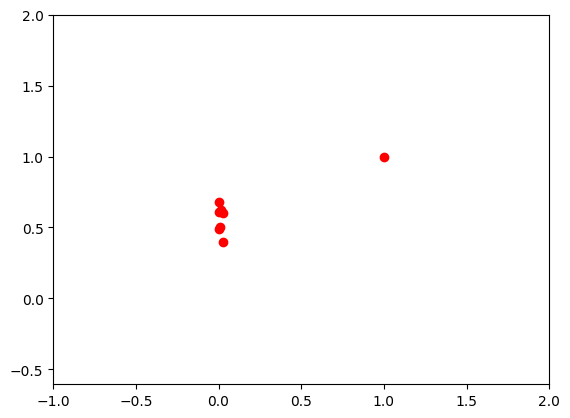


Epoch 2
Epochs: 2
Accuracy: 1.0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=8, test_size=2, random_state=42)

w, epoch = percep_fit(X_train, y_train, a=0.0001, verbose=True, draw=True)
out = percep_predict(X_test, w)
accuracy = calc_accuracy(out, y_test)

print('Epochs:', epoch)
print('Accuracy:', accuracy)


Epoch 1
Bobot: [-1.0, -0.01257489916685195, -0.62236829634598, -0.4757406763162795]


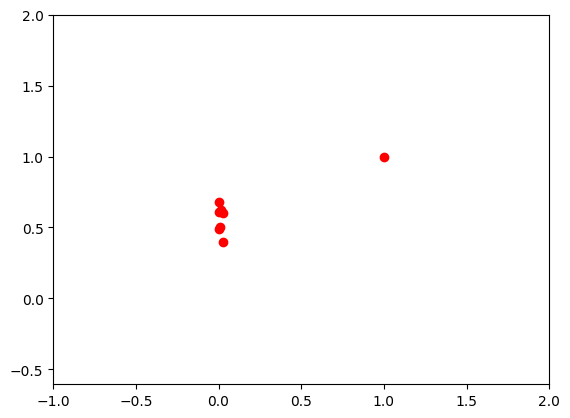


Epoch 2
Epochs: 2
Accuracy: 1.0


In [13]:
w, epoch = percep_fit(X_train, y_train, a=1, verbose=True, draw=True)
out = percep_predict(X_test, w)
accuracy = calc_accuracy(out, y_test)
print('Epochs:', epoch)
print('Accuracy:', accuracy)

**Pertanyaan**  
Dikarenakan training untuk mencapai akurasi 1.0 memakan waktu yang lama kita membatasi max epoch menjadi 10. Perhatikan bobot dari kedua proses training di atas. Bandingkan hasil yang didapatkan dan jelaskan apa pengaruh learning rate yang di masukkan!

Jawab:
Pada percobaan menggunakan dua learning rate (0.0001 dan 1) selama 10 epoch, learning rate 0.0001 menghasilkan pembelajaran yang lambat dan stabil, dengan bobot yang belum mencapai optimal. Sebaliknya, learning rate 1 mempercepat pembelajaran, tetapi bisa menyebabkan ketidakstabilan dan overshoot. Dalam hal akurasi, learning rate besar bisa cepat mendekati akurasi tinggi namun kurang stabil, sementara learning rate kecil lebih stabil tetapi lambat mencapai hasil optimal. Pemilihan learning rate yang tepat penting untuk menyeimbangkan kecepatan dan stabilitas pembelajaran.
